# First Order System
현재 시간의 상태가 이전 시간의 상태와 관련이 있다고 가정    

## 이전 시간의 상태만 입력으로
> Autonomous System이라고도 하며, 외부 입력 없이 자기 혼자서 돌아가는 특징이 있습니다.

수식은 아래와 같다.
$$
x_t = f(x_{t-1})
$$
- $x$ : 상태
- $t$ : 시간
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

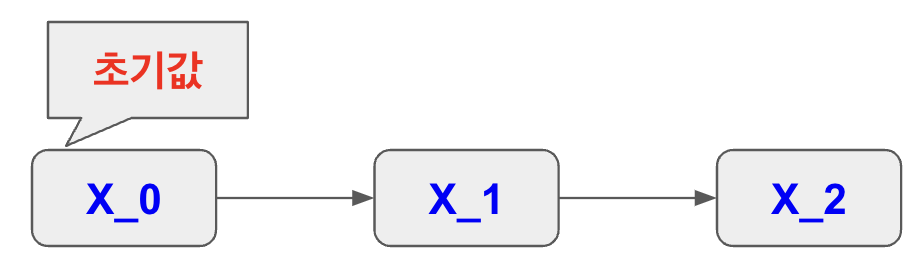

## 이전 시간의 상태와 현재 값을 입력으로
수식은 아래와 같다.
$$
x_t = f(x_{t-1},u_t)
$$
- $x$ : 상태
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태

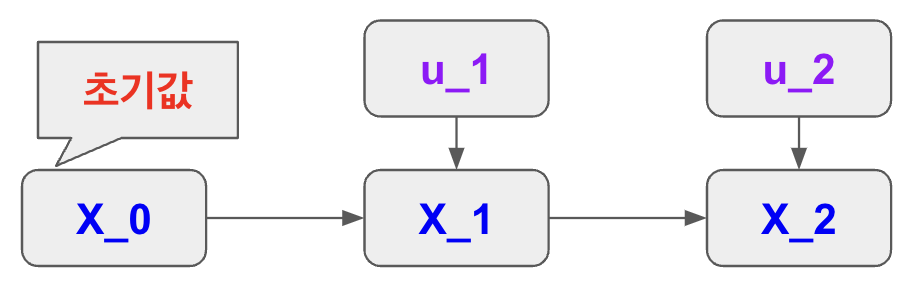

# State-Space Model
- 1차원 시스템의 모형(First Order System):     
$$
x_t = f(x_{t-1}, u_t)
$$
- 각 시간에서 관측 가능한 상태($x_t$)의 모음: 출력 $y_t$
$$
y_t = h(x_t)
$$

- $x$ : 상태(hidden layer의 state)
- $t$ : 시간
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태
- $y_t$: t시간일 때의 출력 값

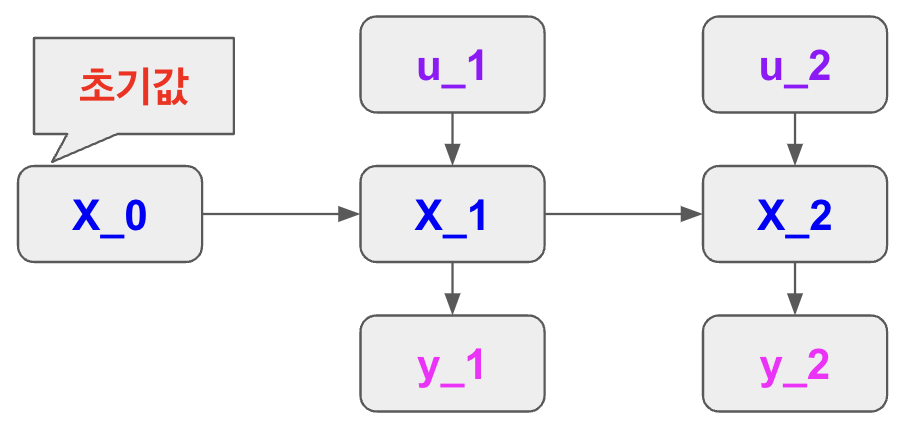

# [RNN(Recurrent Neural Networks)](https://ko.wikipedia.org/wiki/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D)
- RNN이란 Recurrent Neural Networks의 약자로, 순환 신경망을 뜻합니다. 순환 신경망이라는 이름은 입력받는 신호의 길이가 한정되지 않은 동적 데이터를 처리한다는 점에서 붙여진 이름입니다.    

CNN vs RNN
- CNN은 이미지 구역별로 같은 weight를 공유한다.
- RNN은 시간별 같은 weight를 공유한다.

## RNN 특징
- $h_t$는 t일 때의 hidden layer 상태를 나타낸다.
- $h_t$는 이전까지의 상태($h_{0}, h_{t-1}$)와 이전까지의 입력($x_{t-1}, x_t$)을 대표할 수 있는 압축본이라고 할 수 있습니다.

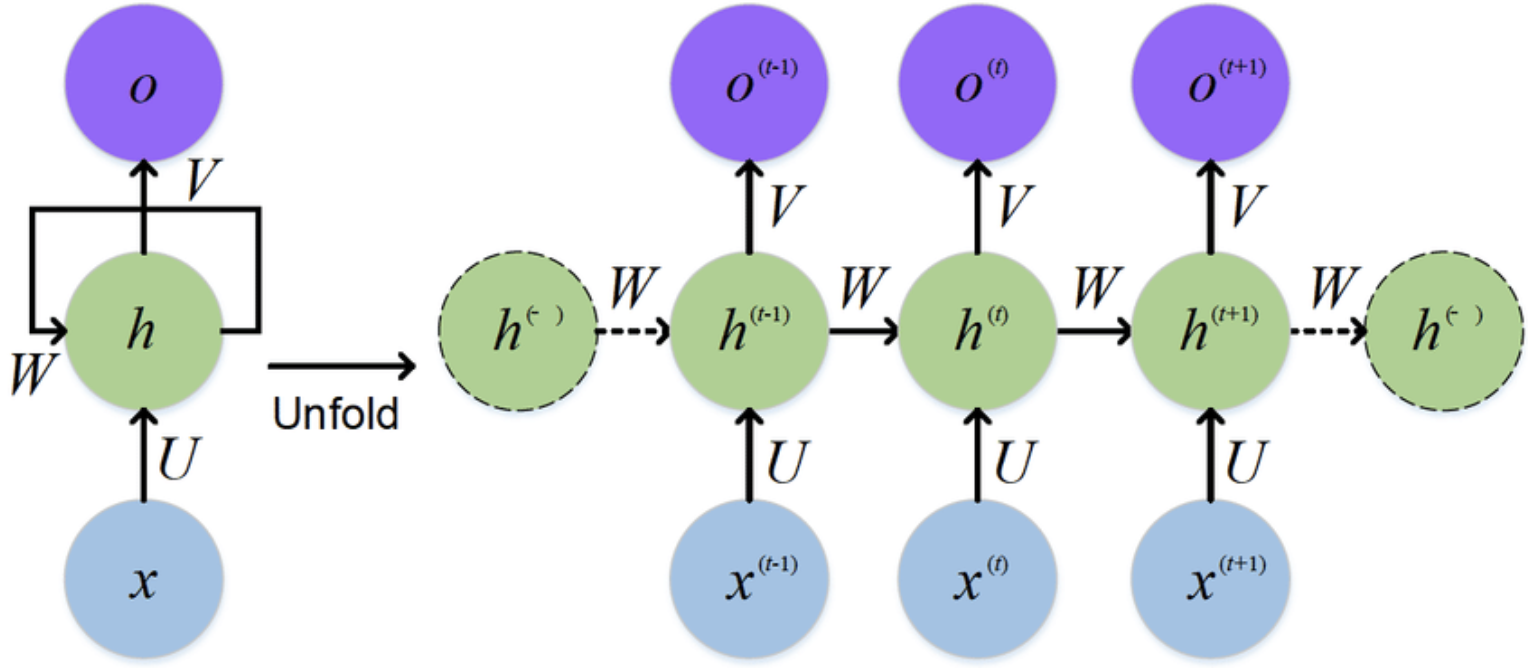

## RNN 구조 종류

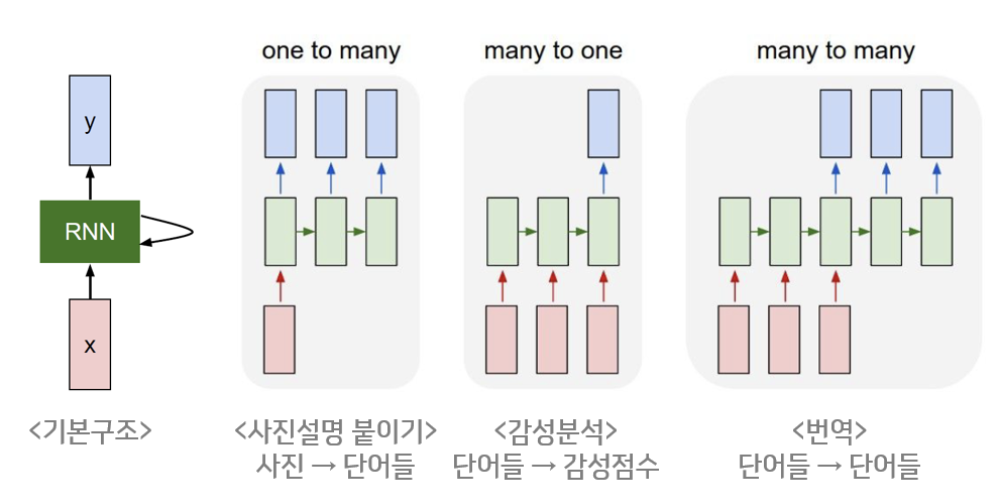

## [RNN 연산](https://wikidocs.net/22886)

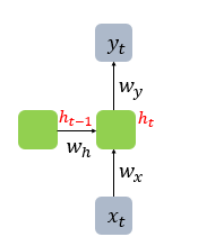

- 현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은  $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다.
- 하나는 입력층을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다.
- 은닉층: $h_t = tanh(W_x x_t + W_h h_{t-1} + b)$
- 출력층: $y_t = f(W_y h_t +b)$
  - f()는 activate function

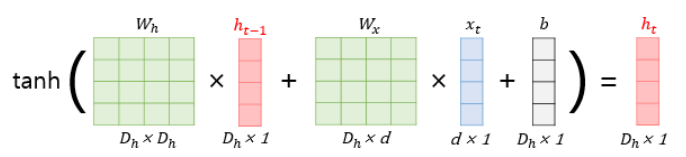

# [RNN V1](https://colab.research.google.com/github/graykode/nlp-tutorial/blob/master/3-1.TextRNN/TextRNN.ipynb)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Data

In [2]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

## Vocab

In [3]:
class Vocab:
  def __init__(self, sentences):
    _word_list = " ".join(sentences).split()
    _word_list = list(set(_word_list))
    self._len_word = len(_word_list)
    self.word_dict = {w: i for i, w in enumerate(_word_list)}
    self.number_dict = {i: w for i, w in enumerate(_word_list)}

  def to_number(self, p_str):
    return self.word_dict[p_str]

  def to_word(self, p_int):
    return self.number_dict[p_int]

  def __len__(self):
    return self._len_word

In [4]:
vocab = Vocab(sentences)

In [5]:
vocab.to_number("i")

2

In [6]:
vocab.to_word(5)

'coffee'

In [7]:
len(vocab)

7

## Dataset

In [8]:
from torch.utils.data import Dataset

In [9]:
class DatasetVer1(Dataset):

  def __init__(self, sentences):
    super().__init__()
    # 1. 어휘집 생성(전체 문자 수, 문자를 숫자로 변경하는 기능, 숫자를 문자로 변경하는 기능)
    self.vocab = Vocab(sentences)
    self.n_class = len(vocab) # 전체 문자 수
    # 2. 원핫 인코딩 메트릭스 생성
    self.one_hot_mat = np.eye(self.n_class)
    # 3. features와 target 생성
    self.features, self.targets = self.__create_data(sentences)

  def __create_data(self, sentences):
    features = []
    targets = []

    for sen in sentences:
      # tokenizer
      sen = sen.split()
      # create feature & target
      feature = [ self.vocab.to_number(word) for word in sen[:-1] ] # featuer
      target = self.vocab.to_number(sen[-1]) # target

      # add
      features.append(self.__to_embedding(feature))
      targets.append(target)
    return torch.FloatTensor(features), torch.LongTensor(targets)

  def __to_embedding(self, feature):
    return self.one_hot_mat[feature]

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.targets[idx]

In [10]:
dt = DatasetVer1(sentences)

<ipython-input-9-1e705bb9b264>:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.FloatTensor(features), torch.LongTensor(targets)


In [11]:
dt[0]

(tensor([[0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.]]),
 tensor(4))

## DataLoader

In [12]:
from torch.utils.data import DataLoader

In [13]:
dl = DataLoader(dt, batch_size=3, shuffle=True)

In [14]:
len(dl)

1

In [15]:
features, targets = next(iter(dl))
features.shape, targets.shape

(torch.Size([3, 2, 7]), torch.Size([3]))

In [16]:
features

tensor([[[0., 0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.]],

        [[0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.]],

        [[0., 0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0.]]])

In [17]:
targets

tensor([6, 4, 5])

## [RNN Model](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

In [18]:
class TextRNN1(nn.Module):
    def __init__(self, n_class, n_hidden=5, n_layer=3, is_bidirection=True):
        super().__init__()
        # 변수 정의
        self.n_hidden = n_hidden
        self.n_layer = n_layer
        self.is_bidirection = is_bidirection
        # 레이어 정의
        self.rnn = nn.RNN(input_size=n_class, hidden_size=self.n_hidden, num_layers=self.n_layer, bidirectional=self.is_bidirection)
        self.linear = nn.Linear(self.n_hidden, n_class)

    def forward(self, X): # (batch_size, input_size, embedding_size)
        # 초기값 생성 (n_direction * n_layer, batch_size, n_hidden)
        if self.is_bidirection:
            init_hidden = torch.zeros(2*self.n_layer, X.shape[0], self.n_hidden)
        else:
            init_hidden = torch.zeros(1*self.n_layer, X.shape[0], self.n_hidden)

        _input = X.transpose(0, 1) # (input_size, batch_size, embedding_size)
        # _outputs: (input_size, batch_size, n_hidden)
        # _hiddens: (n_direction * n_layer, batch_size, n_hidden)
        _outputs, _hiddens = self.rnn(_input, init_hidden)
        # _hidden: (batch_size, n_hidden)
        _hidden = _hiddens[-1] # 마지막 데이터만 사용
        # pred: (batch_size, n_class)
        pred = self.linear(_hidden)
        return pred


### 디버깅

- init()

In [19]:
n_hidden = 5
n_layer = 3
is_bidirection = False
n_class = dt.n_class

In [20]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden, num_layers=n_layer, bidirectional=is_bidirection)
rnn

RNN(7, 5, num_layers=3)

In [21]:
linear = nn.Linear(n_hidden, n_class)
linear

Linear(in_features=5, out_features=7, bias=True)

- forward()

In [22]:
features.shape

torch.Size([3, 2, 7])

In [23]:
if is_bidirection:
    init_hidden = torch.zeros(2*n_layer, features.shape[0], n_hidden)
else:
    init_hidden = torch.zeros(1*n_layer, features.shape[0], n_hidden)

init_hidden.shape

torch.Size([3, 3, 5])

In [24]:
_input = features.transpose(0, 1)
_input.shape

torch.Size([2, 3, 7])

In [25]:
_outputs, _hiddens = rnn(_input, init_hidden)

In [26]:
_outputs.shape

torch.Size([2, 3, 5])

In [27]:
_hiddens.shape

torch.Size([3, 3, 5])

In [28]:
_hiddens[-1].shape

torch.Size([3, 5])

In [29]:
pred = linear(_hiddens[-1])
pred.shape

torch.Size([3, 7])

In [30]:
criterion = nn.CrossEntropyLoss()

In [31]:
pred.shape, targets.shape

(torch.Size([3, 7]), torch.Size([3]))

In [32]:
criterion(pred, targets)

tensor(1.7975, grad_fn=<NllLossBackward0>)

## Training

In [33]:
def train_step(p_model, p_loss_fn, p_optimizer, p_dl):
    epoch_loss = 0

    for features, targets in p_dl:
        pred = p_model(features)

        loss = p_loss_fn(pred, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(p_dl)

In [34]:
dt = DatasetVer1(sentences)
dl = DataLoader(dt, batch_size=3, shuffle=True)

model = TextRNN1(dt.n_class)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epoch = 5000
for epoch in range(n_epoch):
    epoch_loss = train_step(model, criterion, optimizer, dl)

    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(epoch_loss))

Epoch: 1000 cost = 0.074614
Epoch: 2000 cost = 0.012634
Epoch: 3000 cost = 0.004236
Epoch: 4000 cost = 0.002038
Epoch: 5000 cost = 0.001108


## Predict

In [35]:
predict_features, predict_target = dt[0]
predict_features.shape # (input_size, embedding_size)

torch.Size([2, 7])

In [36]:
predict_features = torch.unsqueeze(predict_features, 0)
predict_features.shape # (batch_size, input_size, embedding_size)

torch.Size([1, 2, 7])

In [37]:
predict_pred = model(predict_features)
predict_pred.shape # (n_class)

torch.Size([1, 7])

In [38]:
predict_pred

tensor([[-2.2923, -1.8453, -2.0525, -2.7498,  6.4788, -3.5924, -1.0444]],
       grad_fn=<AddmmBackward0>)

In [39]:
pred_soft = predict_pred.softmax(dim=0)
pred_soft.shape

torch.Size([1, 7])

In [40]:
pred_soft

tensor([[1., 1., 1., 1., 1., 1., 1.]], grad_fn=<SoftmaxBackward0>)

In [41]:
pred_max = pred_soft.argmax(dim=0)
pred_max.shape

torch.Size([7])

In [42]:
pred_max

tensor([0, 0, 0, 0, 0, 0, 0])

모델 예측과 실제값이 같음

In [43]:
pred_max == predict_target

tensor([False, False, False, False, False, False, False])

# RNN V2

In [44]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchtext.vocab import build_vocab_from_iterator

from tqdm.auto import tqdm

## [Data](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [45]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/3. NLP Pytorch/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


In [46]:
df_en = pd.read_csv(DATA_PATH+"IMDB/IMDB-Dataset.csv")

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- 원활한 학습을 위해서 데이터량을 5000개로 줄임;;;

In [47]:
df_en = df_en[:5000]
print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Preprocessing

### Cleaning(정제)

In [48]:
df_en['sentiment'] = df_en['sentiment'].map({'positive':1, 'negative':0})

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [49]:
df_en['review'] = df_en['review'].map(lambda x: x.strip())
df_en['review'] = df_en['review'].map(lambda x: x.lower())

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [50]:
df_en['review'] = df_en['review'].map(lambda x: x.replace('<br />',''))

print(f'{df_en.isnull().sum().sum()} / {df_en.shape}')
df_en.head()

0 / (5000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


### [Tokenization(토큰화)](https://spacy.io/models/en)

In [51]:
import spacy # 형태소 분석기

In [52]:
!python -m spacy download en_core_web_sm

2023-09-06 01:11:16.387257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
nlp = spacy.load("en_core_web_sm") # 형태소 분석기 객체 생성

### Stemming(추출) / Stopword(불용어)

In [54]:
def tokenizer(text):
    doc = nlp(text)
    return [ token.lemma_ for token in doc if token.tag_[0] in "NVJ"] # N(명사), V(동사), J(형용사)


In [55]:
def yield_tokens(data, tokenizer):
    for text in tqdm(data):
        yield tokenizer(text)

### 어휘집 생성
- `<pad>(패딩)`: 0
- `<unk>(정의되지 않은 문자)`: 1

In [56]:
gen = yield_tokens(df_en["review"],tokenizer)
vocab = build_vocab_from_iterator(gen, specials=["<pad>","<unk>"])
vocab.set_default_index(vocab["<unk>"])
len(vocab)

  0%|          | 0/5000 [00:00<?, ?it/s]

35876

In [57]:
vocab(["watching","other","reviewer"])

[5274, 19, 864]

In [58]:
vocab.lookup_tokens([5274, 19, 864, 1, 0])

['watching', 'other', 'reviewer', '<unk>', '<pad>']

In [59]:
features = [ vocab(tokenizer(text)) for text in df_en["review"].tolist()]
len(features)

5000

### Padding

- 최대 문장길이

In [60]:
max_len = max(len(lst) for lst in features)
max_len

913

- 패딩 적용

In [61]:
features = [ lst + [0] * (max_len - len(lst))  if len(lst) < max_len else lst for lst in features]
features = np.array(features)
features.shape

(5000, 913)

## Dataset

In [84]:
from torch.utils.data import Dataset

In [62]:
target = df_en["sentiment"].to_numpy()
target.shape

(5000,)

In [65]:
target = target.reshape(-1,1)
target.shape

(5000, 1)

In [85]:
class ReviewDataset(Dataset):
    def __init__(self,x,y=None):
        self.x = x # features
        self.y = y # target

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self,idx):
        item = {}
        item["x"] = torch.LongTensor(self.x[idx])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        return item

In [67]:
dt = ReviewDataset(features,target)

In [68]:
len(dt)

5000

In [72]:
len(dt[0]['x']), len(dt[0]['y'])

(913, 1)

## DataLoader

In [82]:
from torch.utils.data import DataLoader

In [83]:
dl = DataLoader(dt,batch_size=256,shuffle=True)

In [74]:
len(dl) # 5000 / 256 -> 전체 데이터를 / 베치 크기

20

In [75]:
batch = next(iter(dl))
batch['x'][:2], batch['y'][:2]

(tensor([[   2,   80, 1645,  ...,    0,    0,    0],
         [6135,  409, 4312,  ...,    0,    0,    0]]),
 tensor([[0.],
         [1.]]))

## RNN Model

In [76]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [102]:
class TextRNN2(nn.Module):
  def __init__(self, size_vocab, device, num_output=1, dim_embed=64, hidden_size=64, linear_size=64, num_layers=1, is_bidirection=False):
    super().__init__()
    self.device = device
    self.num_output = num_output
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.is_bidirection = is_bidirection

    self.embed = nn.Embedding(size_vocab, dim_embed)
    self.rnn = nn.RNN(input_size=dim_embed, hidden_size=self.hidden_size, num_layers=self.num_layers, bidirectional=self.is_bidirection)

    self.fclayer = nn.Linear(hidden_size, linear_size)
    self.outlayer = nn.Linear(linear_size, num_output)

  def forward(self, x): # (batch, seq_len)
    # 초기값 생성 (n_direction * num_layers, batch_size, n_hidden)
    scaler = 2 if self.is_bidirection == True else 1 # Bi-LSTM(2), LSTM(1)
    init_hidden = torch.zeros(scaler*self.num_layers, x.shape[0], self.hidden_size)

    emb = self.embed(x) # (batch, seq_len, dim_embed)

    out, hidden_state = self.rnn(emb.transpose(1,0), init_hidden)
    h = hidden_state[-1] # 마지막 hidden 값만 사용

    h = self.fclayer(h).relu()
    predict = self.outlayer(h)
    return predict

In [103]:
model = TextRNN2(len(vocab), device).to(device)
model

TextRNN2(
  (embed): Embedding(35876, 64)
  (rnn): RNN(64, 64)
  (fclayer): Linear(in_features=64, out_features=64, bias=True)
  (outlayer): Linear(in_features=64, out_features=1, bias=True)
)

## Engine

In [104]:
def train_loop(dataloader,model,loss_fn,optimizer,device):
    epoch_loss = 0
    model.train()
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_fn(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)

    return epoch_loss

In [105]:
from sklearn.metrics import accuracy_score

@torch.inference_mode()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    total_acc = 0
    model.eval()

    pred_list = []
    sig = torch.nn.Sigmoid()

    for batch in dataloader:

        pred = model(batch["x"].to(device))

        pred_ = sig(pred)
        pred_ = pred_.to("cpu").numpy()
        pred_list.append(pred_)

        if batch.get("y") is not None:
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()

            pred_ = (pred_ > 0.5).astype(int)
            total_acc += accuracy_score(batch["y"].to("cpu").numpy(), pred_)

    epoch_loss /= len(dataloader)
    total_acc /= len(dataloader)

    # epoch_pred = np.concatenate(pred_list)
    return epoch_loss , total_acc

## KFold

In [106]:
from sklearn.model_selection import KFold, StratifiedKFold

SEED = 42
n_splits = 5
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)

## Training

- 성능이 좋이 않음
  - 학습할 데이터가 너무 적음
  - RNN의 한계

In [108]:
best_score_list = []
epochs = 100
batch_size = 256 #128
vocab_size = len(vocab)

loss_fn = torch.nn.BCEWithLogitsLoss()

for i,(tri,vai) in enumerate(cv.split(features)):
    model = TextRNN2(len(vocab), device).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dt = ReviewDataset(features[tri],target[tri])
    valid_dt = ReviewDataset(features[vai],target[vai])
    train_dl = DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_dt, batch_size=batch_size,shuffle=False)

    best_score = 0
    patience = 0

    for epoch in tqdm(range(epochs)):

        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device )
        valid_loss , score = test_loop(valid_dl, model, loss_fn, device  )

        patience += 1
        if best_score < score:
            print(f'best score: {train_loss, valid_loss, score}') # 트레인 로스, 벨리드 로스, 스코어
            patience = 0
            best_score = score
            # torch.save(model.state_dict(),f"model_{i}.pth")

        if patience == 20:
            break

    print(f"Fold ({i}), BEST ACC: {best_score}")
    best_score_list.append(best_score)

  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6944277510046959, 0.6916445642709732, 0.5305765086206897)
Fold (0), BEST ACC: 0.5305765086206897


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6966696009039879, 0.6943173259496689, 0.5007071659482758)
Fold (1), BEST ACC: 0.5007071659482758


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6943372637033463, 0.694058746099472, 0.4959253771551724)
best score: (0.6936893686652184, 0.6931236386299133, 0.5040746228448276)
Fold (2), BEST ACC: 0.5040746228448276


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.693979874253273, 0.6929036527872086, 0.5132004310344828)
Fold (3), BEST ACC: 0.5132004310344828


  0%|          | 0/100 [00:00<?, ?it/s]

best score: (0.6936356239020824, 0.6937535554170609, 0.4945447198275862)
best score: (0.6932442151010036, 0.6930878907442093, 0.5054552801724138)
Fold (4), BEST ACC: 0.5054552801724138


## Prediction

In [109]:
test_dt = ReviewDataset(features,target)
test_dl = DataLoader(test_dt, batch_size=batch_size,shuffle=False)

loss , pred = test_loop(test_dl, model, loss_fn, device  )

loss, pred

(0.6929487437009811, 0.5079963235294118)